In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 1: Generate noisy sine wave data
def generate_sine_data(num_samples: int, noise_scale: float) -> tuple:
    """
    Generates noisy sine wave data.

    Args:
        num_samples (int): Number of data points.
        noise_scale (float): Standard deviation of Gaussian noise added to sine wave.

    Returns:
        tuple: x values (np.ndarray), y values (np.ndarray).
    """
    X = 2 * np.pi * np.random.rand(num_samples)
    y = np.sin(X) + np.random.normal(0, noise_scale, num_samples)
    return X, y

# Step 2: Fit a linear regression model
def fit_linear_model(X: np.ndarray, y: np.ndarray) -> LinearRegression:
    """
    Fits a linear regression model to the data.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.

    Returns:
        LinearRegression: Fitted linear model.
    """
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    return model

# Step 3: Plot the data, regression line, and error lines
def plot_results_with_error_lines(X: np.ndarray, y: np.ndarray, model: LinearRegression, num_points_fit: int) -> None:
    """
    Plots the original data, regression line, and error lines.

    Args:
        X (np.ndarray): Original x values.
        y (np.ndarray): Original y values.
        model (LinearRegression): Fitted linear model.
        num_points_fit (int): Number of points for fitting line.
    """
    plt.figure(figsize=(10, 6))

    # Scatter plot of actual data
    plt.scatter(X, y, label='Actual Data', color='blue')

    # Plot regression line
    X_fit = np.linspace(0, 2 * np.pi, num_points_fit)
    y_pred = model.predict(X_fit.reshape(-1, 1))
    plt.plot(X_fit, y_pred, label='Regression Line', color='red')

    # Draw error lines
    y_pred_actual = model.predict(X.reshape(-1, 1))
    for xp, yp, y_hat in zip(X, y, y_pred_actual):
        plt.plot([xp, xp], [yp, y_hat], color='gray', linestyle='dotted')

    # Calculate and display regression metrics
    mse = mean_squared_error(y, y_pred_actual)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred_actual)
    plt.title(f'Linear Regression with Error Lines\nMSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()


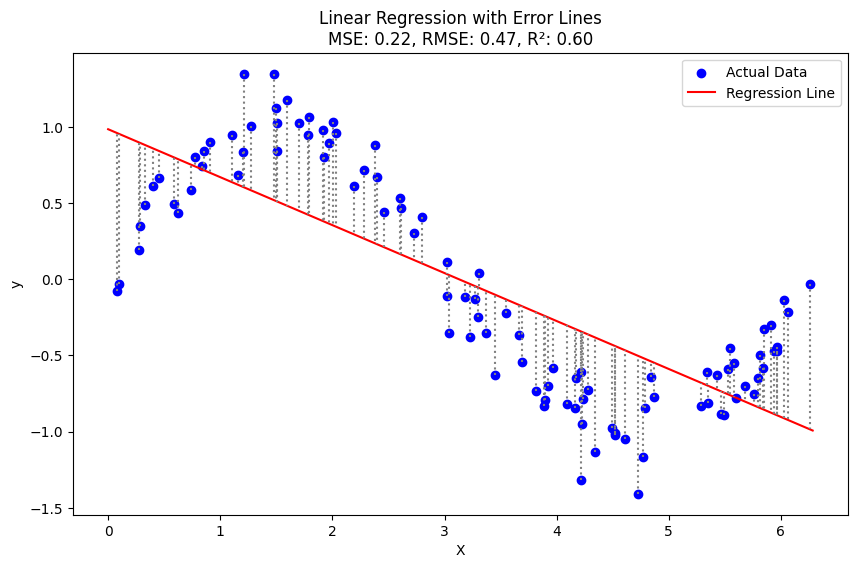

In [3]:
# Step 1: Generate data
X, y = generate_sine_data(100, 0.15)

# Step 2: Fit the linear regression model
model = fit_linear_model(X, y)

# Step 3: Plot the data and results
plot_results_with_error_lines(X, y, model, 100)

In [4]:
def generate_data(slope: float, intercept: float, noise_scale: float, num_points: int, x_range: tuple) -> tuple:
    """
    Generates linear data with added Gaussian noise.

    Args:
        slope (float): Slope of the linear relationship.
        intercept (float): Intercept of the linear relationship.
        noise_scale (float): Standard deviation of the Gaussian noise.
        num_points (int): Number of data points to generate.
        x_range (tuple): The range of x values.

    Returns:
        tuple: x values and y values of the generated data.
    """
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = slope * x + intercept + np.random.normal(0, noise_scale, num_points)
    return x, y

def calculate_mse(y_actual: np.ndarray, y_predicted: np.ndarray) -> float:
    """
    Calculates the Mean Squared Error (MSE) between actual and predicted values.

    Args:
        y_actual (np.ndarray): Actual y values.
        y_predicted (np.ndarray): Predicted y values.

    Returns:
        float: Calculated MSE.
    """
    return np.mean((y_actual - y_predicted) ** 2)

def plot_data_with_mse(x: np.ndarray, y: np.ndarray, true_slope: float, true_intercept: float, ax: plt.Axes, title: str) -> None:
    """
    Plots the data and a line representing the true relationship, annotating the plot with MSE.

    Args:
        x (np.ndarray): x values of the data.
        y (np.ndarray): y values of the data.
        true_slope (float): Slope of the true relationship.
        true_intercept (float): Intercept of the true relationship.
        ax (plt.Axes): The axes to plot on.
        title (str): Title for the subplot.
    """
    mse = calculate_mse(y, true_slope * x + true_intercept)
    ax.scatter(x, y, label=f"MSE = {mse:.2f}")
    ax.plot(x, true_slope * x + true_intercept, color="r", label="True Line")
    ax.legend()
    ax.set_title(title)

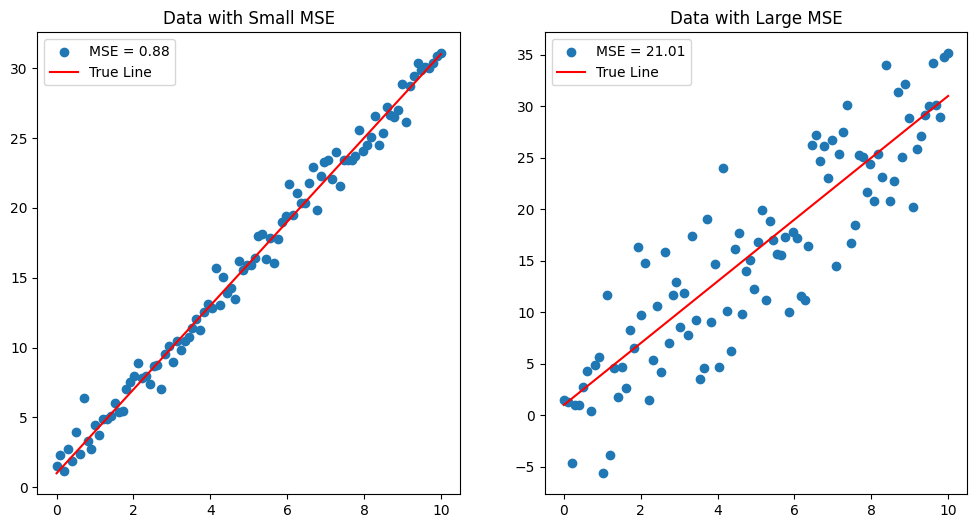

In [5]:
# Generating two sets of data
x1, y1 = generate_data(3, 1, 1, 100, (0, 10))  # Data with small noise
x2, y2 = generate_data(3, 1, 5, 100, (0, 10))  # Data with larger noise

# Creating two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the data sets
plot_data_with_mse(x1, y1, 3, 1, ax[0], "Data with Small MSE")
plot_data_with_mse(x2, y2, 3, 1, ax[1], "Data with Large MSE")

plt.show()